# **Analysis of the Impact of Debt-to-Equity Ratio on Stock Performance Across Different Sectors**

**Importing Libraries needed**

In [ ]:
# Import necessary libraries
import pandas as pd    # For data manipulation and analysis
import numpy as np     # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
import scipy.stats as stats  # For statistical operations
import math  # For mathematical operations

**Reading the CSV file**

In [83]:
# Load the dataset from the specified CSV file
df = pd.read_csv("Egy_Stocks_2024-05-08_18-55-20(1).csv")

# Display the first few rows of the dataframe to understand its structure
df.head()

,Unnamed: 0,name,description,recommendation_mark,sector.tr,market,sector,logoid,update_mode,type,...,RSI,Mom,AO,CCI20,Stoch.K,Stoch.D,MACD.macd,MACD.signal,volume,relative_volume_10d_calc
0,205,RUBX,RUBEX INTERNATIONAL FOR PLASTIC AND ACRYLIC MA...,NaN,Consumer Durables,egypt,Consumer Durables,rubex-international-for-plastic-and-acrylic-ma...,delayed_streaming_900,stock,...,33.048112,-0.970,-1.577500,-77.838705,2.601060e+01,2.294890e+01,-0.626091,-0.604627,89718,0.357526
1,161,MKIT,MISR KUWAIT INVESTMENT & TRADING CO.,NaN,Distribution Services,egypt,Distribution Services,misr-kuwait-investment-and-trading-co,delayed_streaming_900,stock,...,48.038973,0.000,-0.000015,-35.087719,-4.736950e-15,-3.947460e-15,-0.001508,-0.002019,500,0.145760
2,2,ACAMD,ARAB CO. FOR ASSET MANAGEMENT AND DEVELOPMENT,NaN,Finance,egypt,Finance,arab-co-for-asset-management-and-development,delayed_streaming_900,stock,...,30.885165,-0.252,-0.166950,-110.960758,1.474695e+01,1.483239e+01,-0.065469,-0.047511,6622226,0.614970
3,125,ICID,INTERNATIONAL CO FOR INVESTMENT & DEVELOPMENT,NaN,Finance,egypt,Finance,international-co-for-investment-and-development,delayed_streaming_900,stock,...,39.023912,-0.170,-0.193029,-71.287779,3.630952e+01,3.948413e+01,-0.123541,-0.138910,150812,0.332322
4,127,ICMI,INTERNATIONAL COMPANY FOR MEDICAL INDUSTRIES -...,NaN,Distribution Services,egypt,Distribution Services,international-company-for-medical-industries-icmi,delayed_streaming_900,stock,...,47.269638,-0.318,0.139456,-52.420280,1.602106e+01,2.678648e+01,0.057328,0.088177,136438,1.491683


**Cleaning the empty cells in the selected columns**

In [85]:

# Filter out the columns we need
columns_to_check = ['sector', 'debt_to_equity_fq', 'RSI']
df_cleaned = df.dropna(subset=columns_to_check)

# Print the number of rows
print("Number of rows:", df_cleaned.shape[0])


Number of rows: 183


**To create another CSV for cleaned data**

In [86]:
# Specify columns to keep
columns_to_keep = ['name', 'description', 'close', 'market_cap_basic', 'sector',
                   'debt_to_equity_fq', 'RSI', 'Volatility.W', 'Volatility.M', 'Perf.1Y', 'Perf.5Y']

# Drop columns that are not in columns_to_keep
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
df_cleaned.to_csv('final_product2.csv', index=False) #saved it in another one to make it clearer for us

**To make sure the data has the correct data types**

In [69]:
# Verify the data types of the filtered DataFrame
print(df_cleaned.dtypes)


name                  object
description           object
sector                object
close                float64
Perf.5Y              float64
Volatility.W         float64
Volatility.M         float64
market_cap_basic     float64
debt_to_equity_fq    float64
RSI                  float64
dtype: object


**Counting the Companies in each Sector**

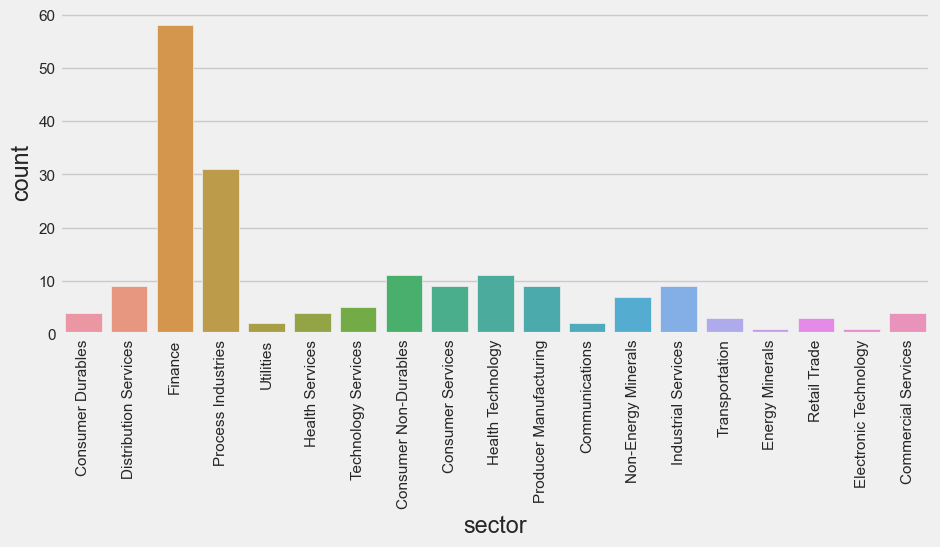

In [87]:
# Plot a count plot for the 'sector' column in the df_cleaned DataFrame
sns.countplot(data=df_cleaned, x='sector')

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

Description:
This bar chart displays the number of companies in each sector from the cleaned dataset.

Reasoning:
To understand the distribution of companies across sectors, ensuring that there are enough data points for a meaningful analysis within each sector.

Conclusion:
The Finance sector has the highest number of companies, followed by the Process Industries sector. Several sectors have fewer than 4 companies, indicating a need to filter out these sectors for further analysis to maintain statistical validity.

**Scatter Plot of Debt-to-Equity Ratio vs RSI by each Sector**

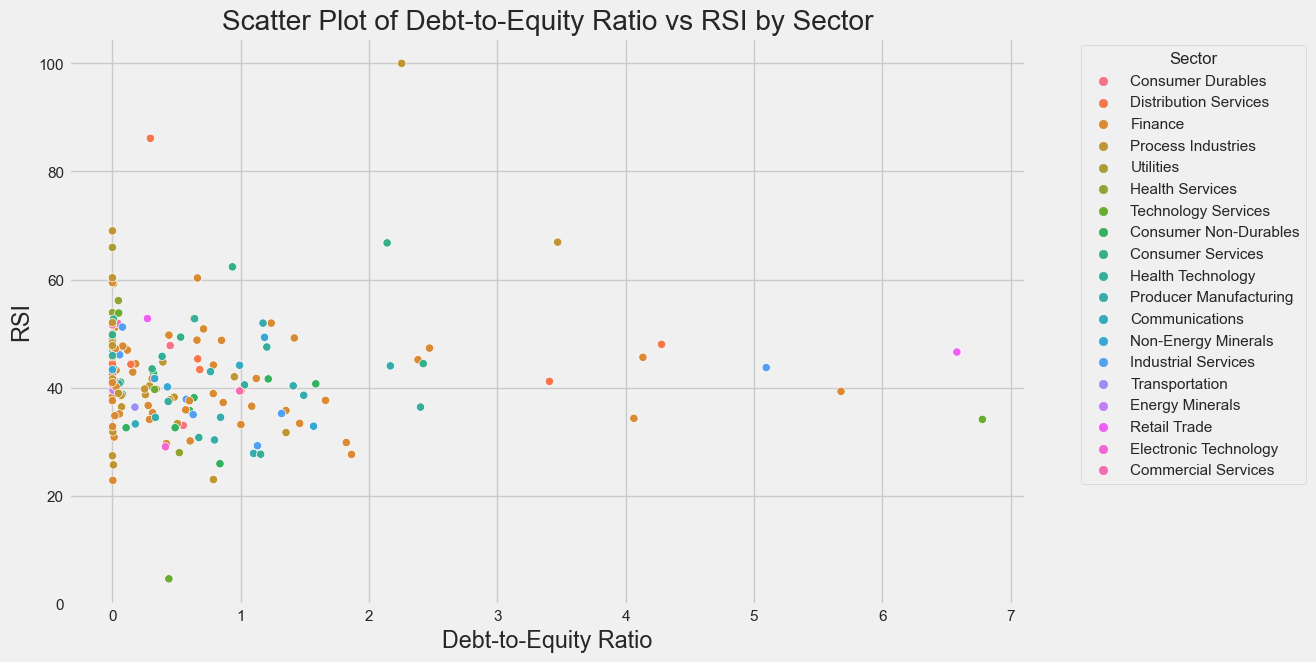

In [88]:


# Create a scatter plot of Debt-to-Equity Ratio vs RSI by Sector
plt.figure(figsize=(11, 7))  # Set the figure size to 11x7 inches

# Use seaborn to create the scatter plot
sns.scatterplot(x='debt_to_equity_fq', y='RSI', hue='sector', data=df_cleaned)

# Set the label for the x-axis
plt.xlabel('Debt-to-Equity Ratio')

# Set the label for the y-axis
plt.ylabel('RSI')

# Set the title of the plot
plt.title('Scatter Plot of Debt-to-Equity Ratio vs RSI by Sector')

# Add a legend with the title 'Sector', positioning it outside the plot to the right
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()



Description:
This scatter plot visualizes the relationship between debt-to-equity ratio and RSI for all companies across different sectors, with each sector represented by a different color.

Reasoning:
To explore the overall relationship between debt-to-equity ratio and RSI across sectors and identify any visible patterns or trends.

Conclusion:
There is no clear trend or pattern visible in the scatter plot, suggesting that the relationship between debt-to-equity ratio and RSI may vary by sector. This warrants a more detailed sector-specific analysis.

**Box plot of Debt-to-Equity Ratio across all Sectors with at least 4 companies**

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3660\2738159267.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  box_plot.set_yticklabels(box_plot.get_yticks(), fontsize=12)  # Set y-axis tick labels font size to 12


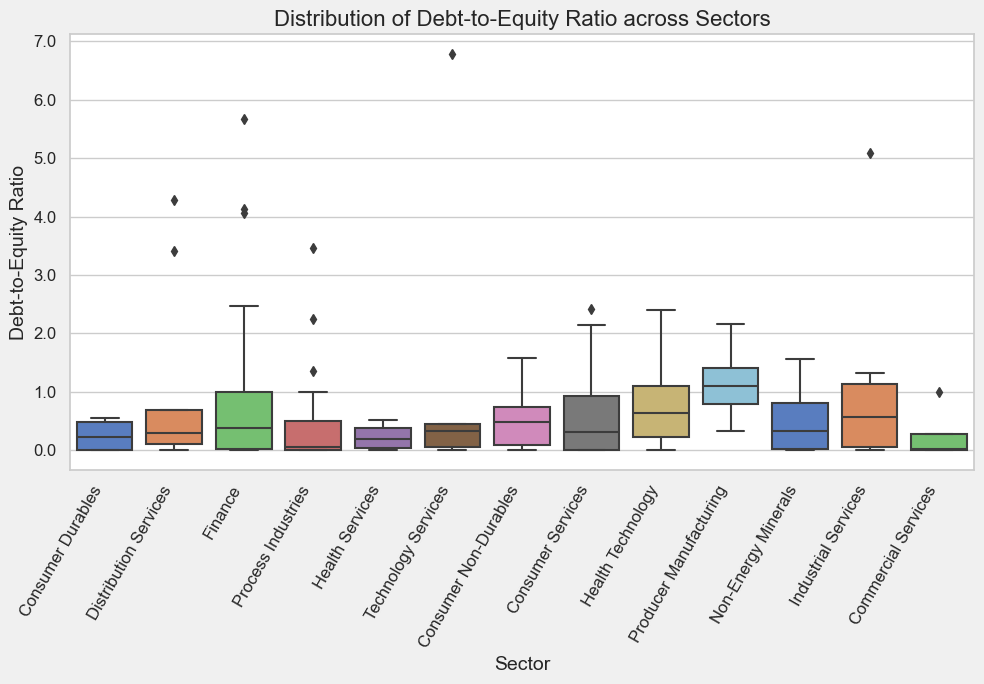

In [89]:
# Step 1: Filter out sectors with fewer than 4 companies
sector_counts = df_cleaned['sector'].value_counts()  # Count the number of companies in each sector
valid_sectors = sector_counts[sector_counts >= 4].index  # Select sectors with at least 4 companies
filtered_df = df_cleaned[df_cleaned['sector'].isin(valid_sectors)]  # Filter the DataFrame to include only valid sectors

# Step 2: Create the box plot
plt.figure(figsize=(10, 7))  # Set the figure size to 10x7 inches
sns.set(style="whitegrid")  # Set the style of the plot to 'whitegrid'

# Create the box plot with enhanced aesthetics
box_plot = sns.boxplot(
    x='sector',  # Set the x-axis to the 'sector' column
    y='debt_to_equity_fq',  # Set the y-axis to the 'debt_to_equity_fq' column
    data=filtered_df,  # Use the filtered DataFrame for the plot
    palette="muted",  # Set the color palette to 'muted' for softer colors
    linewidth=1.5  # Set the linewidth of the box edges
)

# Adjust plot parameters for better appearance
box_plot.set_xlabel('Sector', fontsize=14)  # Set the x-axis label with font size 14
box_plot.set_ylabel('Debt-to-Equity Ratio', fontsize=14)  # Set the y-axis label with font size 14
box_plot.set_title('Distribution of Debt-to-Equity Ratio across Sectors', fontsize=16)  # Set the title of the plot with font size 16
box_plot.set_xticklabels(box_plot.get_xticklabels(), rotation=60, ha='right', fontsize=12)  # Rotate x-axis labels 60 degrees, align to the right, and set font size to 12
box_plot.set_yticklabels(box_plot.get_yticks(), fontsize=12)  # Set y-axis tick labels font size to 12

# Show plot
plt.tight_layout()  # Adjust the padding of the plot to fit elements neatly
plt.show()  # Display the plot


Description:
A box plot showing the distribution of debt-to-equity ratios across sectors with at least 4 companies.

Reasoning:
To visualize the spread and central tendency of debt-to-equity ratios within each sector and identify any outliers.

Conclusion:
Sectors like Finance, Process Industries, and Consumer Services show a wider range of debt-to-equity ratios, indicating variability in leverage among companies within these sectors. Sectors with higher median debt-to-equity ratios may indicate higher leverage.

**Removeing outliers by sector**

In [90]:
def remove_outliers_by_sector(df, column, group_col):
    def remove_outliers(group):
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        # Determine the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Return the group with outliers removed
        return group[(group[column] >= lower_bound) & (group[column] <= upper_bound)]

    # Apply the remove_outliers function to each group defined by group_col
    return df.groupby(group_col).apply(remove_outliers).reset_index(drop=True)

# Assuming df_cleaned is your dataframe
df_cleaned_no_outliers = remove_outliers_by_sector(df_cleaned, 'debt_to_equity_fq', 'sector')

# Print the number of rows after removing outliers
print("Number of rows after removing outliers:", len(df_cleaned_no_outliers))


Number of rows after removing outliers: 171


**Identify the Central Tendency and the spread of debt to equity**

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


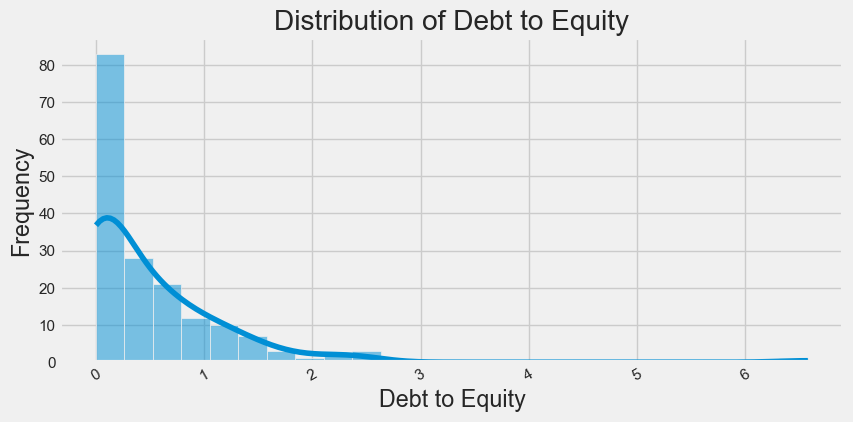

In [92]:
# Set the default figure size to 9x4 inches
plt.rcParams['figure.figsize'] = (9, 4)

# Use the 'fivethirtyeight' style for the plot
plt.style.use('fivethirtyeight')

# Plot the distribution of the 'debt_to_equity_fq' column after removing outliers
# Rotate the x-axis labels by 30 degrees for better readability
plt.xticks(rotation=30)

# Create a histogram of the 'debt_to_equity_fq' column with a Kernel Density Estimate (KDE) overlay
sns.histplot(df_cleaned_no_outliers['debt_to_equity_fq'], kde=True)

# Set the title of the plot
plt.title('Distribution of Debt to Equity')

# Set the label for the x-axis
plt.xlabel('Debt to Equity')

# Set the label for the y-axis
plt.ylabel('Frequency')

# Display the plot
plt.show()


Description:
A histogram showing the distribution of the debt-to-equity ratio after removing outliers.

Reasoning:
To understand the overall distribution and frequency of debt-to-equity ratios within the dataset, ensuring that extreme values (outliers) do not skew the analysis.

Conclusion:
The majority of companies have a debt-to-equity ratio below 1, indicating relatively low leverage across the dataset. The distribution is right-skewed, with a long tail extending to higher values.

***The graph is right skewed ***

**Calculate a 95% confidence interval for the mean of debt to Equity**

In [75]:
# Set the seed for reproducibility
np.random.seed(10)

# Sample size
sample_size = 171

# Take a sample
sample = np.random.choice(a=df_cleaned_no_outliers['debt_to_equity_fq'], size=sample_size)
sample_mean = sample.mean()

# Get the z-critical value (for 95% confidence level)
z_critical = stats.norm.ppf(q=0.95)

# Calculate the population standard deviation
pop_stdev = df_cleaned_no_outliers['debt_to_equity_fq'].std()

# Calculate the margin of error
margin_of_error = z_critical * (pop_stdev / math.sqrt(sample_size))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print the results
print("Sample mean:", sample_mean)
print("z-critical value:", z_critical)
print("Population standard deviation:", pop_stdev)
print("Margin of error:", margin_of_error)
print("Confidence interval:", confidence_interval)
print("True mean:", df_cleaned_no_outliers['debt_to_equity_fq'].mean())

Sample mean: 0.485132078502924
z-critical value: 1.6448536269514722
Population standard deviation: 0.7352999100418304
Margin of error: 0.09248977318929441
Confidence interval: (0.3926423053136296, 0.5776218516922185)
True mean: 0.4962725630116958


Description:
Calculation of a 95% confidence interval for the mean debt-to-equity ratio.

Reasoning:
To estimate the range within which the true mean debt-to-equity ratio of the population lies with 95% confidence.

Conclusion:
The calculated confidence interval provides an estimated range for the mean debt-to-equity ratio, which can be used to understand the average leverage of companies in the dataset.

**Distribution of the Relative Strength Index (RSI)**

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


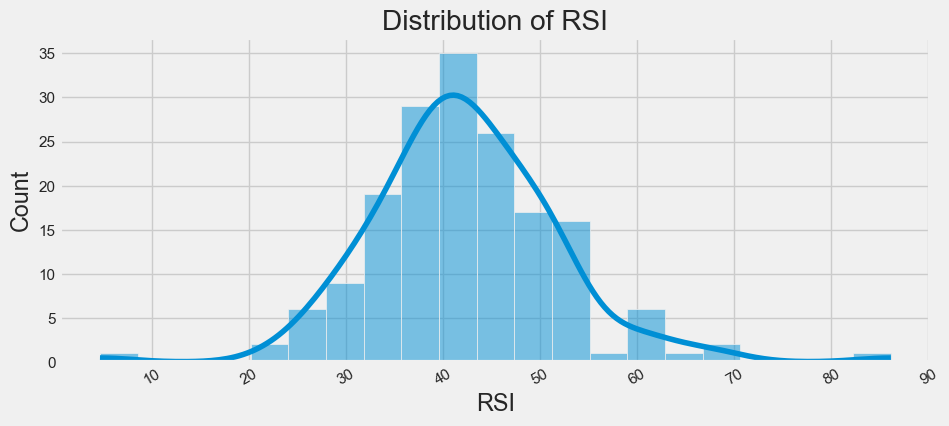

In [93]:
# Set the default figure size to 10x4 inches
plt.rcParams['figure.figsize'] = (10, 4)

# Use the 'fivethirtyeight' style for the plot
plt.style.use('fivethirtyeight')

# Rotate the x-axis labels by 30 degrees for better readability
plt.xticks(rotation=30)

# Create a histogram of the 'RSI' column with a Kernel Density Estimate (KDE) overlay
sns.histplot(df_cleaned_no_outliers['RSI'], kde=True)  # kde=True adds the Kernel Density Estimate

# Set the title of the plot
plt.title('Distribution of RSI')

# Display the plot
plt.show()


Description:
A histogram showing the distribution of the RSI.

Reasoning:
To understand the overall distribution and frequency of RSI values within the dataset.

Conclusion:
The RSI distribution is approximately normal, with most values concentrated around the mean, indicating that the RSI values are fairly balanced across the dataset.

**Calculate a 95% confidence interval for the mean of RSI**

In [77]:
# Assuming df_cleaned_no_outliers is your DataFrame
# Set the seed for reproducibility
np.random.seed(10)

# Sample size
sample_size = 171

# Take a sample from the RSI column
sample_rsi = np.random.choice(a=df_cleaned_no_outliers['RSI'], size=sample_size)
sample_mean_rsi = sample_rsi.mean()

# Get the z-critical value (for 95% confidence level)
z_critical = stats.norm.ppf(q=0.975)  # Two-tailed test

# Calculate the population standard deviation
pop_stdev_rsi = df_cleaned_no_outliers['RSI'].std()

# Calculate the margin of error
margin_of_error = z_critical * (pop_stdev_rsi / math.sqrt(sample_size))

# Calculate the confidence interval
confidence_interval = (sample_mean_rsi - margin_of_error, sample_mean_rsi + margin_of_error)

# Print the results
print("Sample mean RSI:", sample_mean_rsi)
print("z-critical value:", z_critical)
print("Population standard deviation RSI:", pop_stdev_rsi)
print("Margin of error:", margin_of_error)
print("Confidence interval for RSI:", confidence_interval)
print("True mean RSI:", df_cleaned_no_outliers['RSI'].mean())

Sample mean RSI: 41.066662864198825
z-critical value: 1.959963984540054
Population standard deviation RSI: 9.62180541152576
Margin of error: 1.4421372856700267
Confidence interval for RSI: (39.6245255785288, 42.508800149868854)
True mean RSI: 42.27173493745029


Description:
Calculation of a 95% confidence interval for the mean RSI.

Reasoning:
To estimate the range within which the true mean RSI of the population lies with 95% confidence.

Conclusion:
The calculated confidence interval provides an estimated range for the mean RSI, which can be used to understand the average stock performance of companies in the dataset.

**Simple Linear Regression of Debt-to-Equity Ratio vs RSI with the values by Scatter Plot for different sectors**

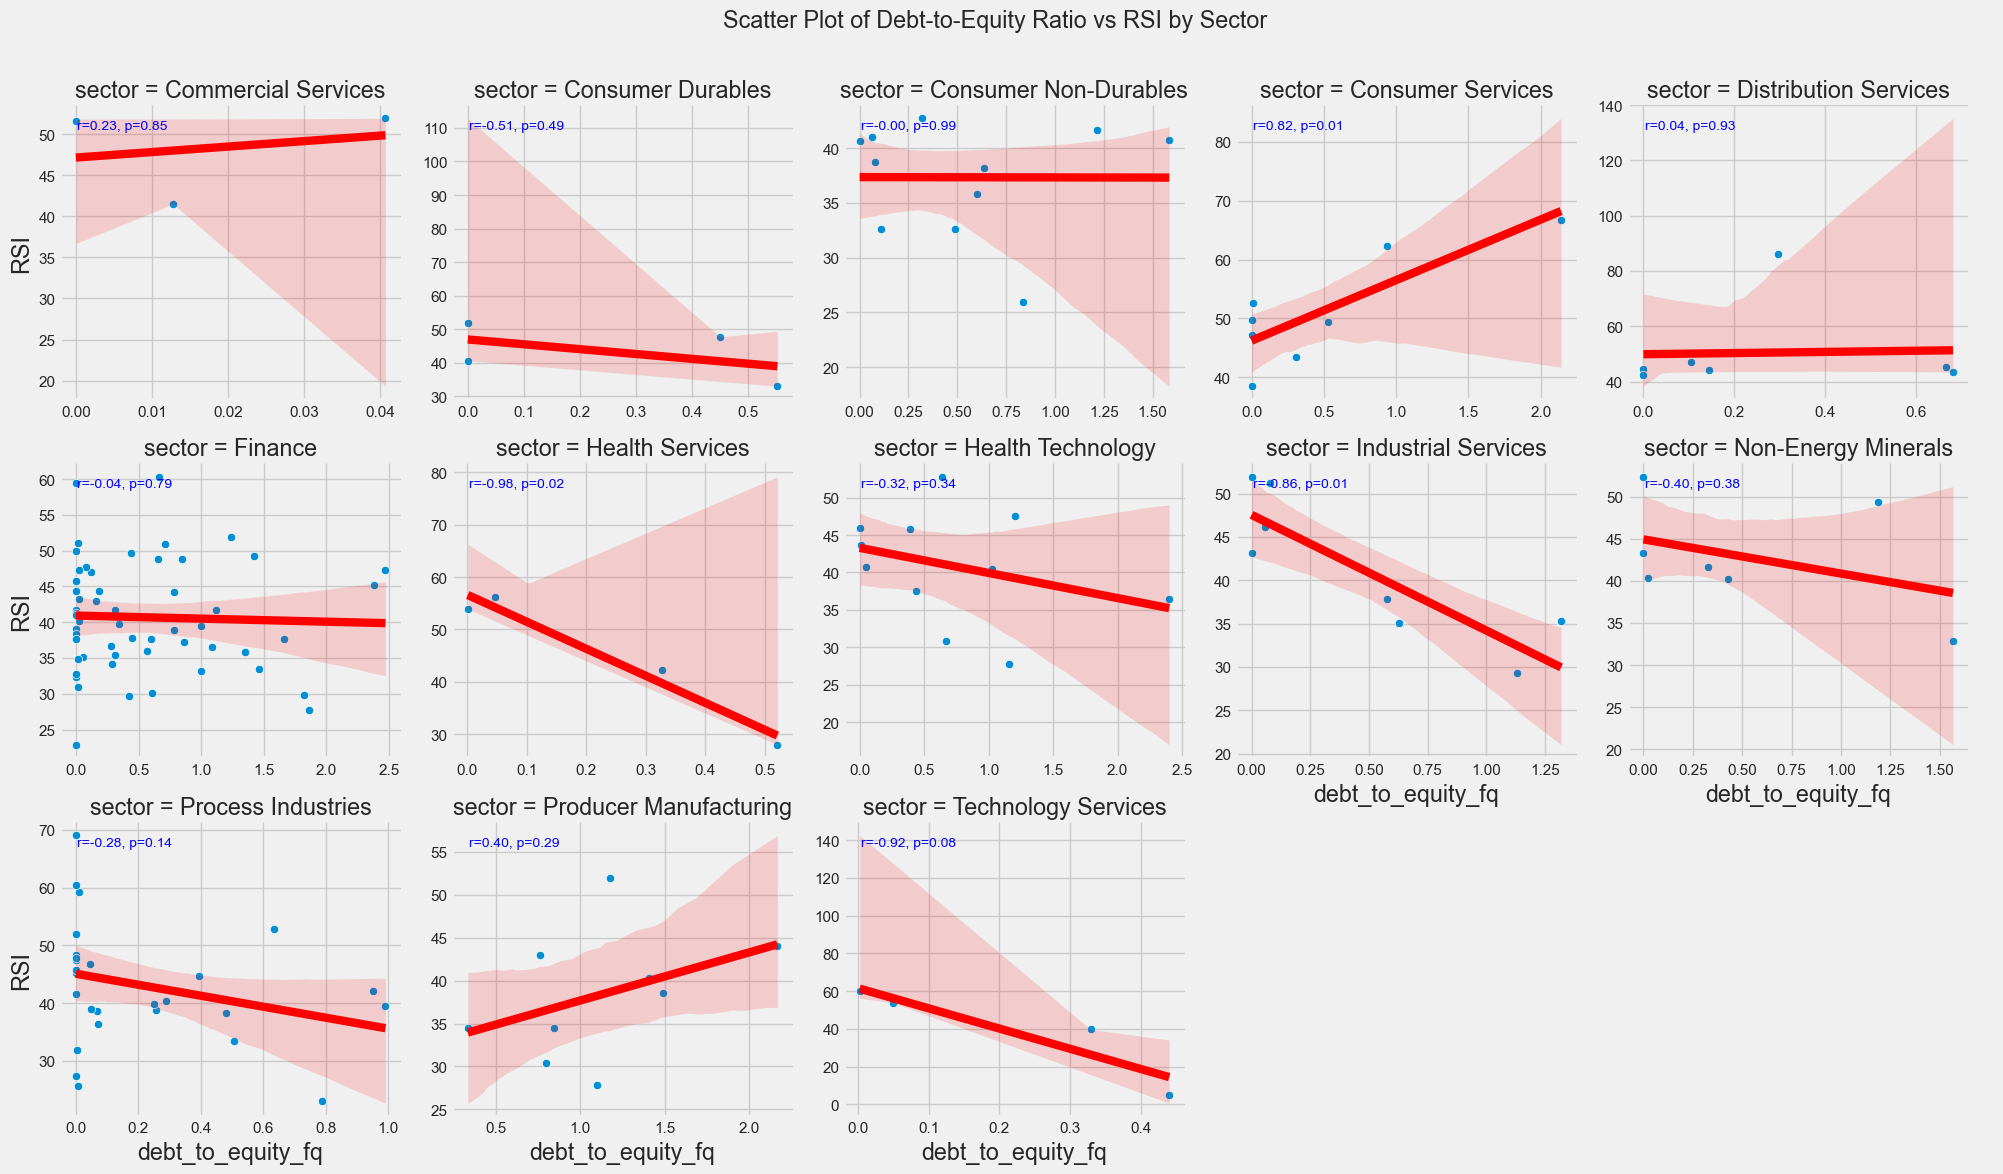

In [94]:
from scipy.stats import pearsonr

# Filter out sectors with fewer than 4 companies
sector_counts = df_cleaned['sector'].value_counts()
valid_sectors = sector_counts[sector_counts >= 4].index
df_cleaned_no_outliers = df_cleaned_no_outliers[df_cleaned_no_outliers['sector'].isin(valid_sectors)]

# Create a faceted scatter plot with regression lines
# Create a FacetGrid with columns based on 'sector', wrapping at 5 columns, each with a height of 4 inches
g = sns.FacetGrid(df_cleaned_no_outliers, col="sector", col_wrap=5, height=4, sharex=False, sharey=False)

# Define a function to plot scatterplot with regression line and calculate Pearson correlation
def scatterplot_with_regression(x, y, **kwargs):
    ax = plt.gca()
    # Plot scatterplot
    sns.scatterplot(x=x, y=y, **kwargs)
    # Plot regression line
    sns.regplot(x=x, y=y, scatter=False, ax=ax, line_kws={'color': 'red'})
    # Calculate Pearson correlation
    r, p = pearsonr(x, y)
    # Annotate the correlation coefficient and p-value
    ax.annotate(f'r={r:.2f}, p={p:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=10, color='blue',
                horizontalalignment='left', verticalalignment='top')

# Map the function to each facet
g.map(scatterplot_with_regression, "debt_to_equity_fq", "RSI")

# Add legend
g.add_legend()

# Adjust the subplot layout to make room for the title
plt.subplots_adjust(top=0.9)

# Set the overall title for the FacetGrid
g.fig.suptitle('Scatter Plot of Debt-to-Equity Ratio vs RSI by Sector')

# Display the plot
plt.show()


Description:
Scatter plots with regression lines for each sector, showing the relationship between debt-to-equity ratio and RSI.

Reasoning:
To examine the sector-specific relationship between debt-to-equity ratio and RSI, including the strength and direction of this relationship.

Conclusion:
The strength and direction of the relationship between debt-to-equity ratio and RSI vary across sectors. Some sectors show a positive relationship, while others show a negative or no significant relationship.

**Combined Regression Lines of Debt-to-Equity Ratio vs RSI by Sector**

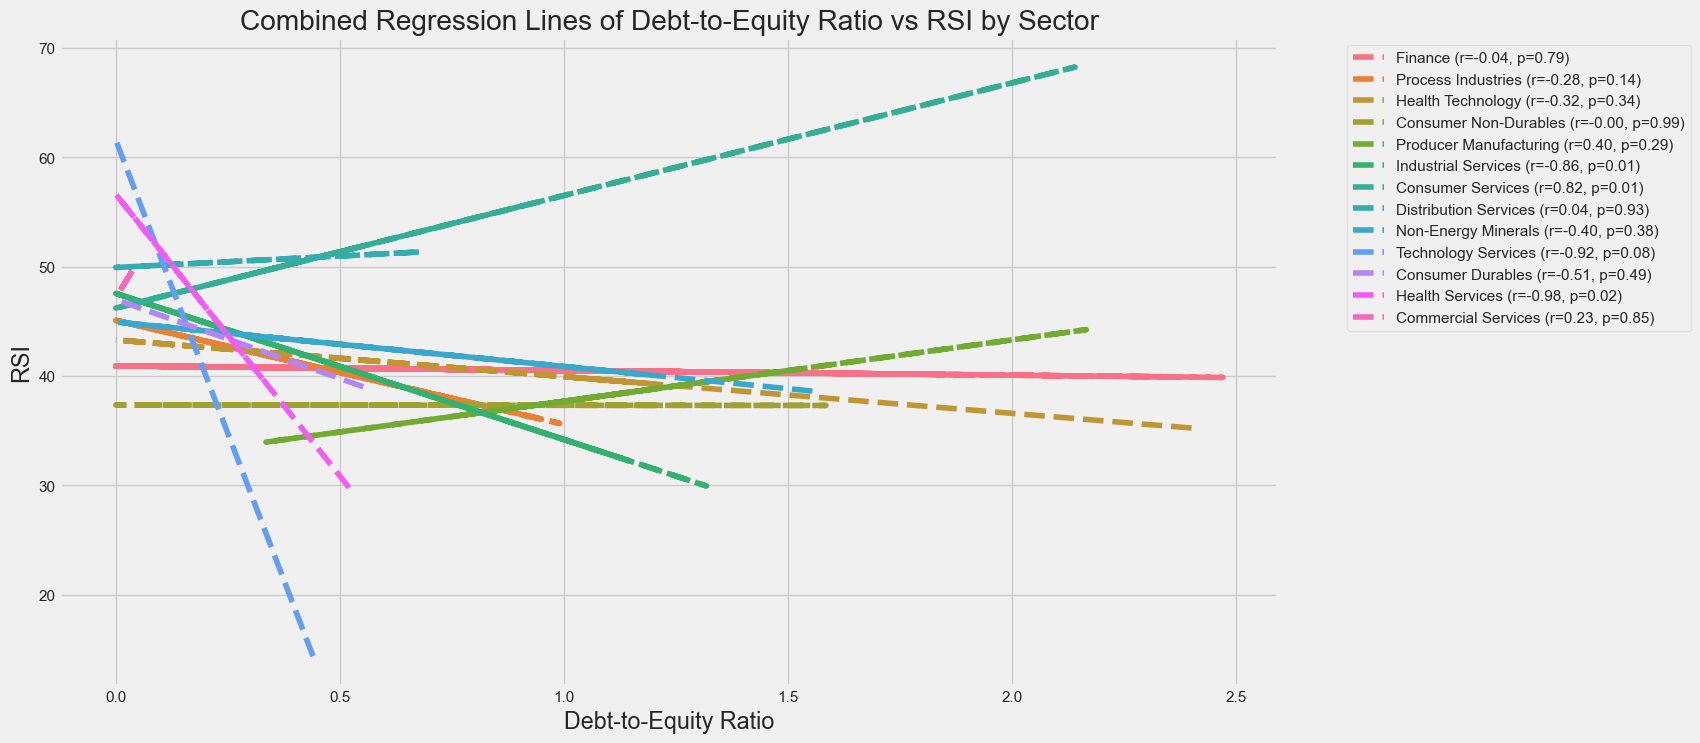

In [95]:
from scipy.stats import linregress

# Define a color palette with enough unique colors
unique_colors = sns.color_palette("husl", len(valid_sectors))

# Create a dictionary to map each sector to a unique color
color_mapping = dict(zip(valid_sectors, unique_colors))

# Create the combined line plot
plt.figure(figsize=(14, 8))

# Add regression lines for each sector
handles = []
for sector in valid_sectors:
    # Filter data for the current sector
    sector_data = df_cleaned_no_outliers[df_cleaned_no_outliers['sector'] == sector]
    x = sector_data['debt_to_equity_fq']
    y = sector_data['RSI']
    
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Get color for current sector from color_mapping
    color = color_mapping[sector]
    
    # Plot the regression line with annotation
    line, = plt.plot(x, intercept + slope * x, linestyle='--', color=color, 
                     label=f'{sector} (r={r_value:.2f}, p={p_value:.2f})')
    
    # Append the line to handles for legend
    handles.append(line)

# Set labels and title
plt.xlabel('Debt-to-Equity Ratio')
plt.ylabel('RSI')
plt.title('Combined Regression Lines of Debt-to-Equity Ratio vs RSI by Sector')

# Add legend outside the plot
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


Description:
Combined regression lines for all sectors, showing the relationship between debt-to-equity ratio and RSI.

Reasoning:
To compare the regression lines across sectors in a single plot, highlighting differences in the relationship between debt-to-equity ratio and RSI.

Conclusion:
The combined regression lines further illustrate the variability in the relationship between debt-to-equity ratio and RSI across sectors. Sectors like Consumer Services and Industrial Services show a significant positive relationship, while sectors like Health Services show a significant negative relationship.

**Correlation (r values) Heatmap of Debt-to-Equity Ratio and RSI by Sector (Filtered)**

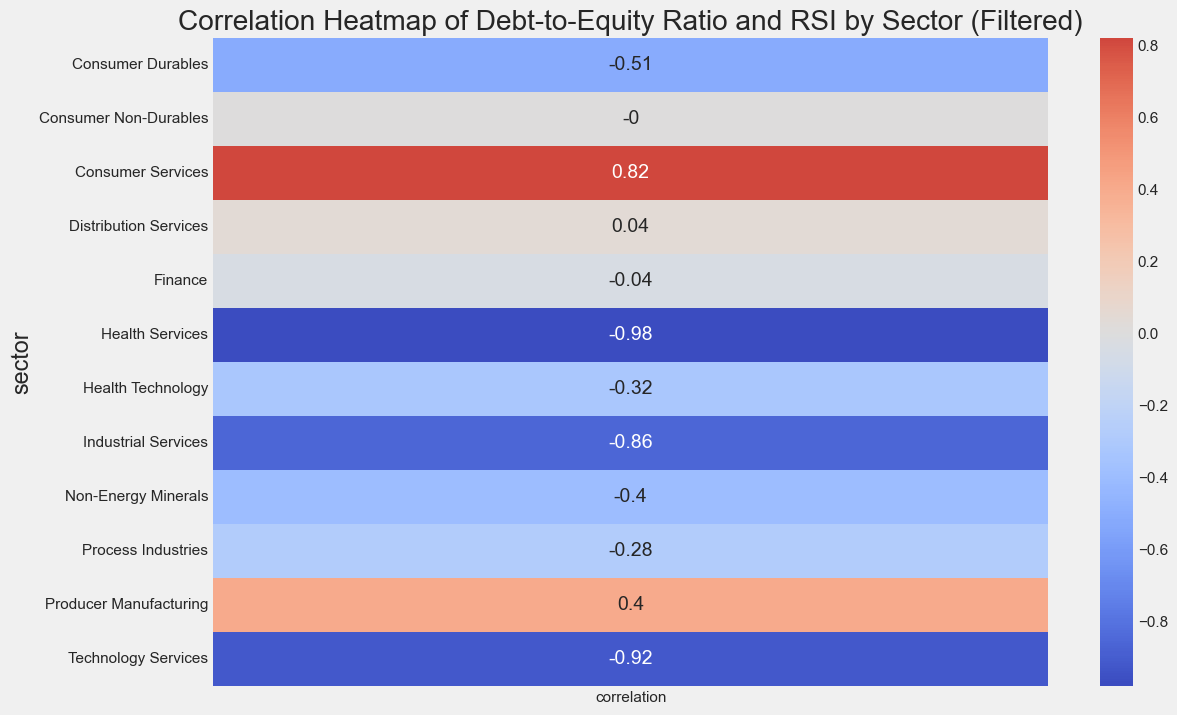

In [96]:
# Filter out sectors with fewer than 4 companies
sector_counts = df_cleaned_no_outliers['sector'].value_counts()
valid_sectors = sector_counts[sector_counts >= 4].index
df_filtered = df_cleaned_no_outliers[df_cleaned_no_outliers['sector'].isin(valid_sectors)]

# Calculate correlation coefficients for each valid sector
# Group the filtered DataFrame by 'sector' and apply correlation calculation to 'debt_to_equity_fq' and 'RSI' columns
correlations = df_filtered.groupby('sector').apply(lambda x: x['debt_to_equity_fq'].corr(x['RSI']))

# Reset index and rename columns for clarity
correlations = correlations.reset_index()
correlations.columns = ['sector', 'correlation']

# Round correlation coefficients to two decimal places
correlations['correlation'] = correlations['correlation'].round(2)

# Create a DataFrame for the heatmap with 'sector' as index
df_corr = correlations.set_index('sector')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Debt-to-Equity Ratio and RSI by Sector (Filtered)')
plt.show()


Description:
A heatmap showing the correlation coefficients between debt-to-equity ratio and RSI for each sector.

Reasoning:
To provide a visual summary of the strength and direction of the correlation between debt-to-equity ratio and RSI across sectors.

Conclusion:
The heatmap reveals varying correlation strengths and directions across sectors. Some sectors show a strong negative correlation (e.g., Health Services), while others show a strong positive correlation (e.g., Consumer Services).

**P-Values of Debt-to-Equity Ratio and RSI Correlation Tests by Sector (Filtered)**

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


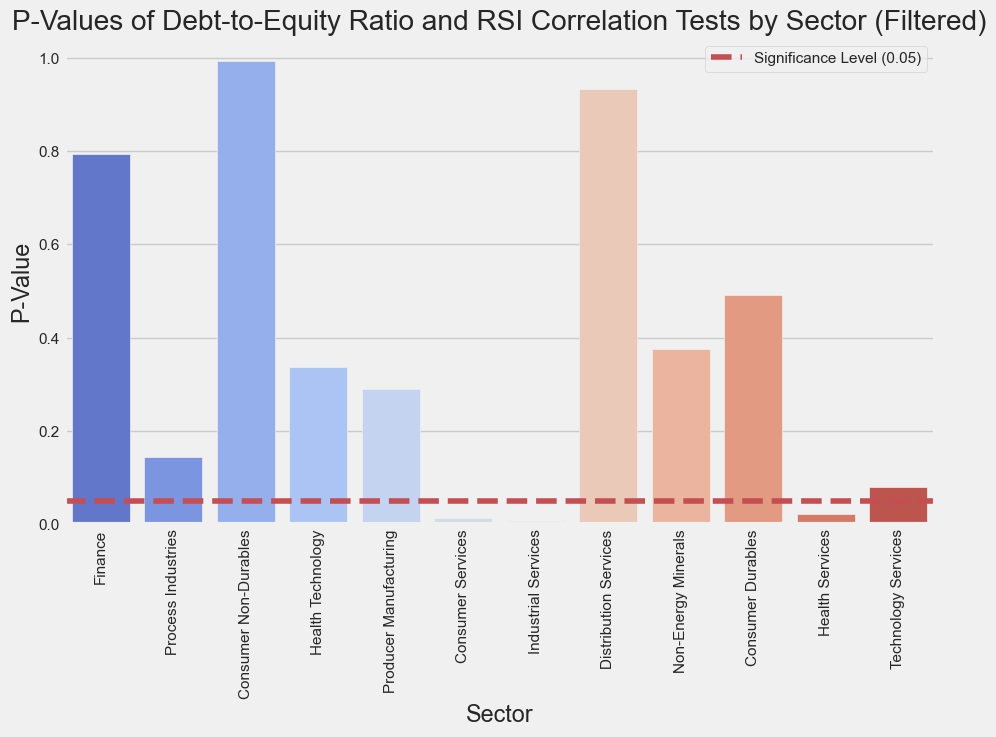

In [98]:
# Calculate p-values for each valid sector
p_values = {}
for sector in valid_sectors:
    sector_data = df_filtered[df_filtered['sector'] == sector]
    _, p_value = stats.pearsonr(sector_data['debt_to_equity_fq'], sector_data['RSI'])
    p_values[sector] = p_value

# Bar plot of p-values
plt.figure(figsize=(10, 6))

# Create the bar plot using seaborn
sns.barplot(x=list(p_values.keys()), y=list(p_values.values()), palette='coolwarm')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a horizontal dashed line at y=0.05 for the significance level
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')

# Set labels and title
plt.xlabel('Sector')
plt.ylabel('P-Value')
plt.title('P-Values of Debt-to-Equity Ratio and RSI Correlation Tests by Sector (Filtered)')
plt.legend()  # Show legend with the significance level

# Display the plot
plt.show()


Description:
A bar plot showing the p-values of the correlation tests between debt-to-equity ratio and RSI for each sector. The red dashed line represents the significance threshold (p = 0.05).

Reasoning:
To provide a visual summary of the statistical significance of the correlation between debt-to-equity ratio and RSI across sectors. The p-values help determine whether the observed correlations are statistically significant.

Conclusion:
The bar plot helps to identify which sectors exhibit statistically significant relationships between debt-to-equity ratio and RSI. While the significant p-values indicate a reliable correlation in sectors like Consumer Services, Industrial Services, and Health Services, the non-significant p-values in other sectors suggest that the relationship between debt-to-equity ratio and RSI is not statistically robust across all sectors. This variability underscores the importance of sector-specific analysis when evaluating the impact of financial leverage on stock performance.